In [13]:
import torch
import torch.nn as nn

import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import random

def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1), random.uniform(0, 0.2), random.uniform(0.8, 1), random.uniform(0, 0.2)])
    return real_data

generate_real()

tensor([0.8304, 0.1802, 0.8215, 0.0723])

In [21]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        # define the network
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

        # define the loss function
        self.loss_function = nn.MSELoss()

        # define the optimiser
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # define the counter
        self.count = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        self.count += 1

        if self.count % 10 == 0:
            self.progress.append(loss.item())

            if self.count % 1000 == 0:
                print("counter = ", self.count)

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))

In [16]:
def generate_random(size=4):
    return torch.rand(size)

generate_random()

tensor([0.6602, 0.4678, 0.7427, 0.7590])

counter =  1000
counter =  2000
counter =  3000
counter =  4000
counter =  5000
counter =  6000
counter =  7000
counter =  8000
counter =  9000
counter =  10000
counter =  11000
counter =  12000
counter =  13000
counter =  14000
counter =  15000
counter =  16000
counter =  17000
counter =  18000
counter =  19000
counter =  20000


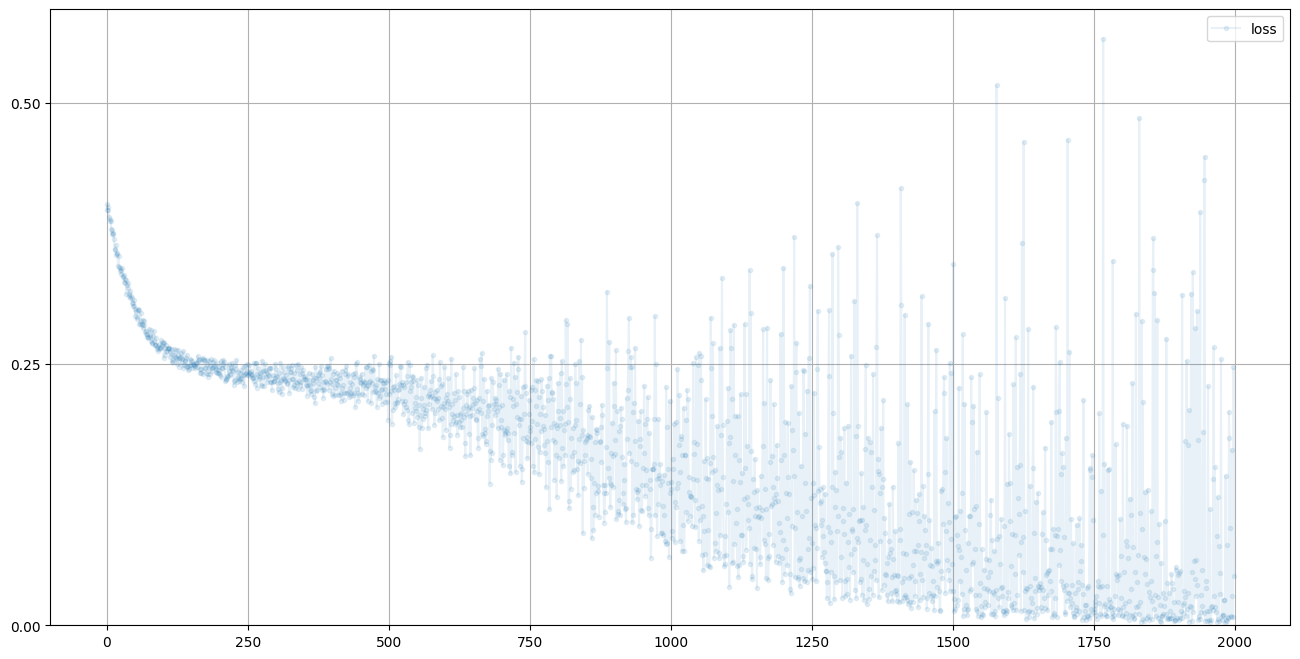

In [23]:
# try to train the discriminator

D = Discriminator()

for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(generate_random(), torch.FloatTensor([0.0]))

D.plot_progress()

In [30]:
class Generator(nn.Module):

    def __init__(self):
        super().__init__()

        # define the network
        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        # define the optimiser
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # define the counter
        self.count = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_outputs = self.forward(inputs)

        d_outputs = D.forward(g_outputs)

        loss = D.loss_function(d_outputs, targets)

        self.count += 1

        if self.count % 10 == 0:
            self.progress.append(loss.item())

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.8))


In [26]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.5118, 0.3996, 0.3880, 0.5421], grad_fn=<SigmoidBackward0>)

In [36]:
# train the generator and discriminator together
image_list = []

D = Discriminator()
G = Generator()

for i in range(10000):
    # use real date to train the discriminator
    D.train(generate_real(), torch.FloatTensor([1.0]))

    # use data from generator to train the discriminator
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))

    # train the generator

    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))

    if i % 1000 == 0:
        image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())

counter =  1000
counter =  2000
counter =  3000
counter =  4000
counter =  5000
counter =  6000
counter =  7000
counter =  8000
counter =  9000
counter =  10000
counter =  11000
counter =  12000
counter =  13000
counter =  14000
counter =  15000
counter =  16000
counter =  17000
counter =  18000
counter =  19000
counter =  20000


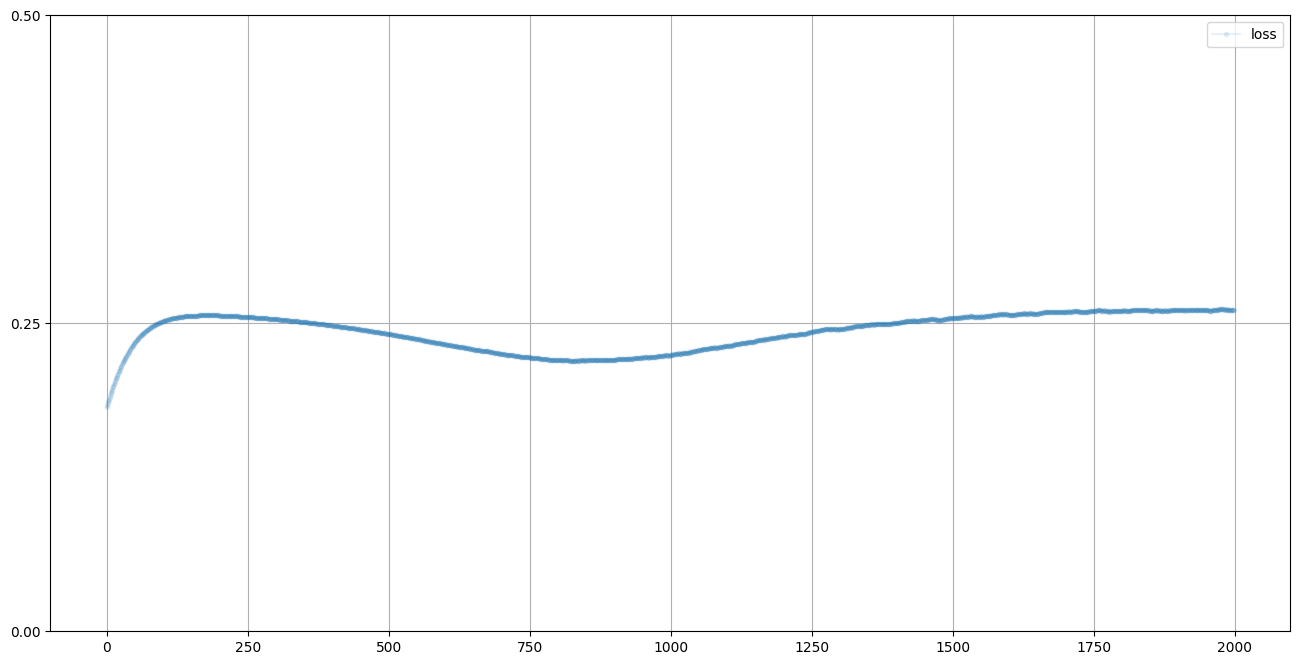

In [28]:
D.plot_progress()

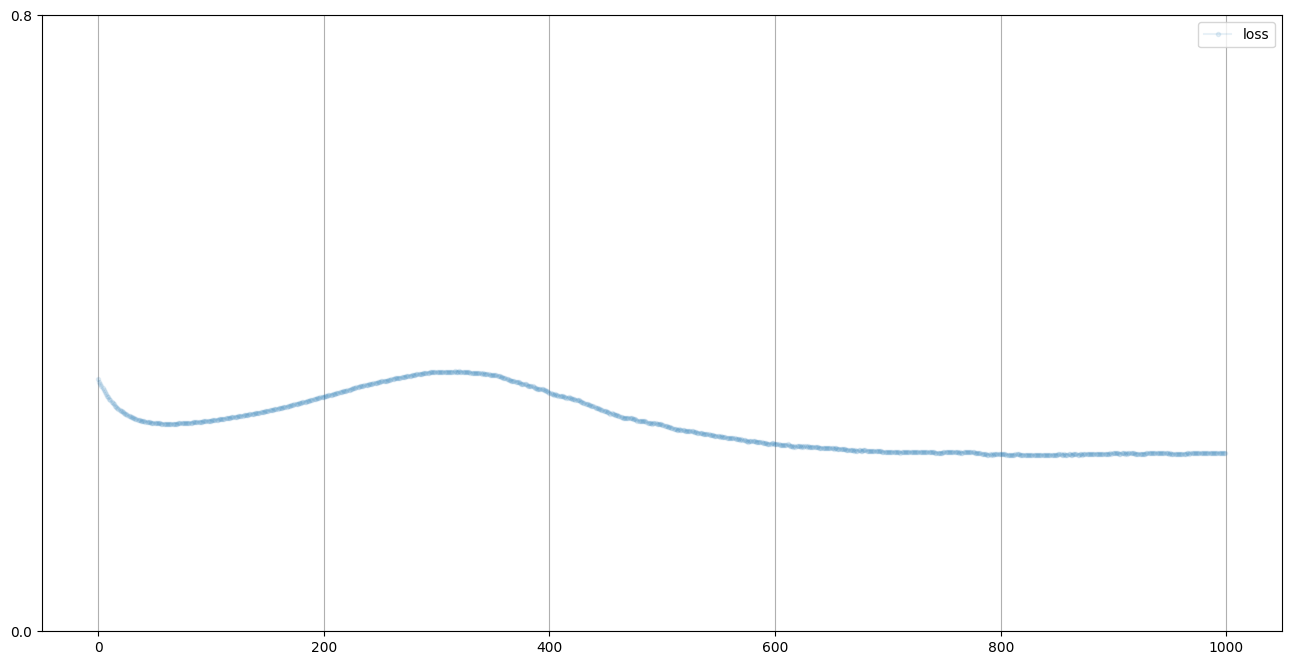

In [33]:
G.plot_progress()

In [35]:
G.forward(torch.FloatTensor([0.1]))

tensor([0.9386, 0.0367, 0.9523, 0.0355], grad_fn=<SigmoidBackward0>)

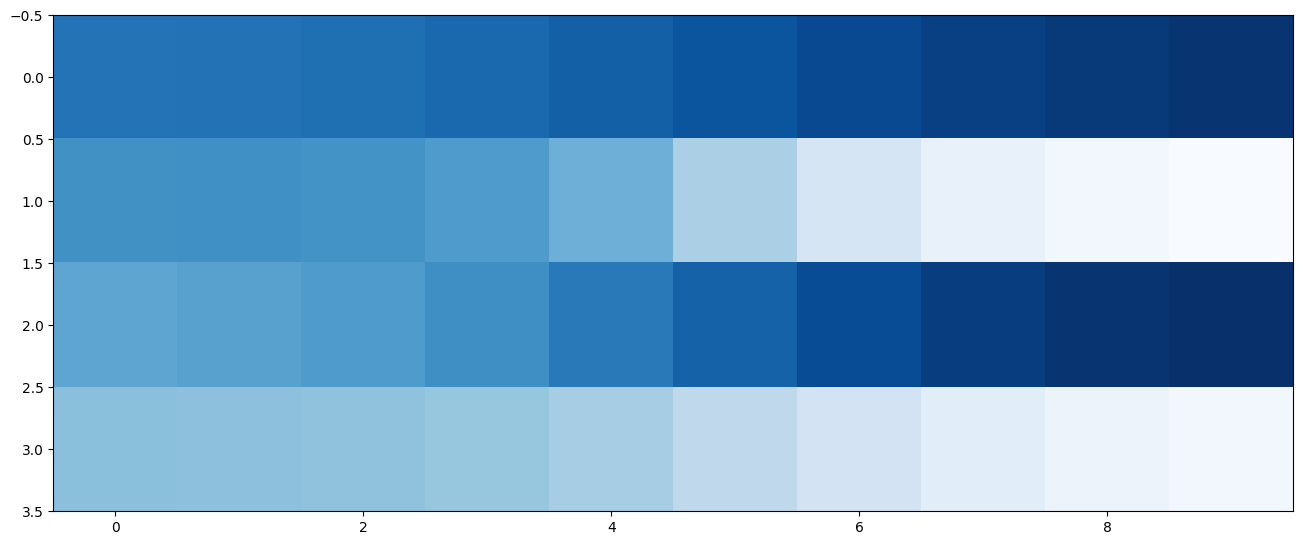

In [37]:
import numpy as np
plt.figure(figsize=(16, 8))
plt.imshow(np.array(image_list).T, interpolation='none', cmap='Blues')